In [2]:
import pandas as pd

from visualization import visualize_with_target, visualize_continuous_with_target

import pandas as pd

from summarytools import dfSummary
import re

import seaborn as sns

In [3]:
train = pd.read_csv('../../data/train.csv')


In [4]:
train[train['세부 시술 유형'].str.contains("FER", na=False)]['세부 시술 유형']


24707     FER
51297     FER
109848    FER
Name: 세부 시술 유형, dtype: object

In [5]:
cols_obj = [col for col in train.columns if pd.api.types.is_object_dtype(train[col])]
cols_cont = [col for col in train.columns if pd.api.types.is_float_dtype(train[col]) and col != '임신 성공 확률']

In [6]:
cols_cont

['이식된 배아 수', '미세주입(ICSI) 배아 이식 수', '배아 이식 후 경과일']

In [7]:
def 특정시술유형(df):
    def categorize_procedure(proc):
        if pd.isnull(proc):
            return None
        tokens = [token.strip() for token in re.split(r'[/,:]', proc)
            if token.strip() and not token.strip().isdigit()]

        # 우선순위에 따라 범주화
        if "Unknown" in tokens:
            return "Unknown"
        if "AH" in tokens:
            return "AH"
        if "BLASTOCYST" in tokens:
            return "BLASTOCYST"
        if tokens.count("ICSI") >= 2 or tokens.count("IVF") >= 2:
            return "2ICSI_2IVF"
        if "IVF" in tokens and "ICSI" in tokens:
            return "IVF_ICSI"
        if tokens == ["ICSI"]:
            return "ICSI"
        if tokens == ["IVF"]:
            return "IVF"
        return ",".join(tokens) if tokens else None

    df = df.copy()
    df["세부 시술 유형"] = df["세부 시술 유형"].apply(categorize_procedure)  
    return df


In [8]:
train_pre = 특정시술유형(train)

In [9]:
train_pre = train_pre.fillna(-999)

In [10]:
train_pre['세부 시술 유형'].value_counts(dropna=False)

세부 시술 유형
ICSI          56714
IVF           43912
Unknown       18676
BLASTOCYST     2429
2ICSI_2IVF     1460
IVF_ICSI       1213
AH              988
DI              847
FER               3
-999              2
Name: count, dtype: int64

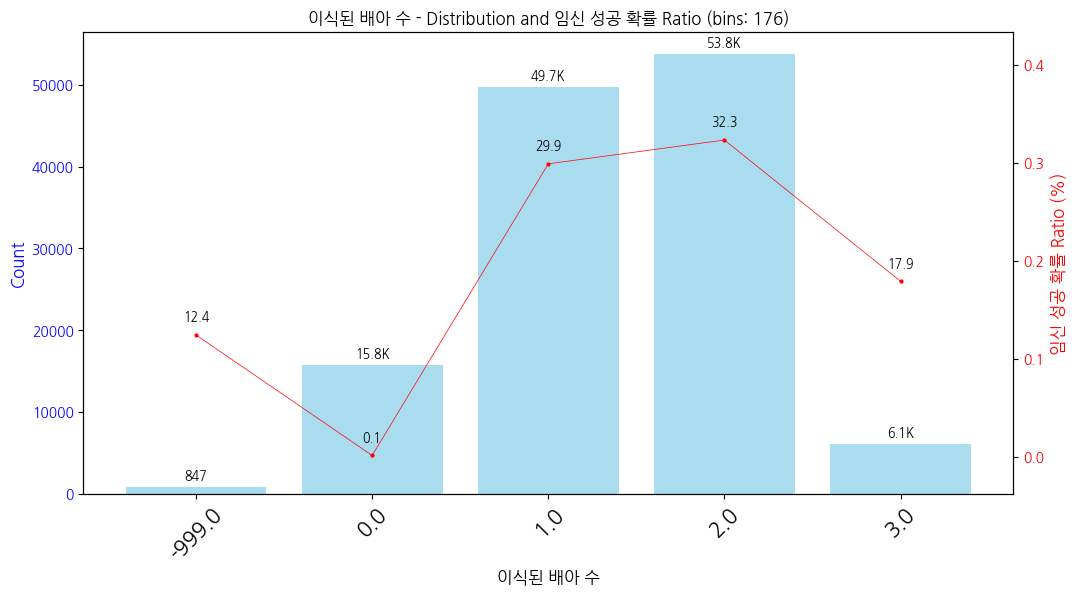

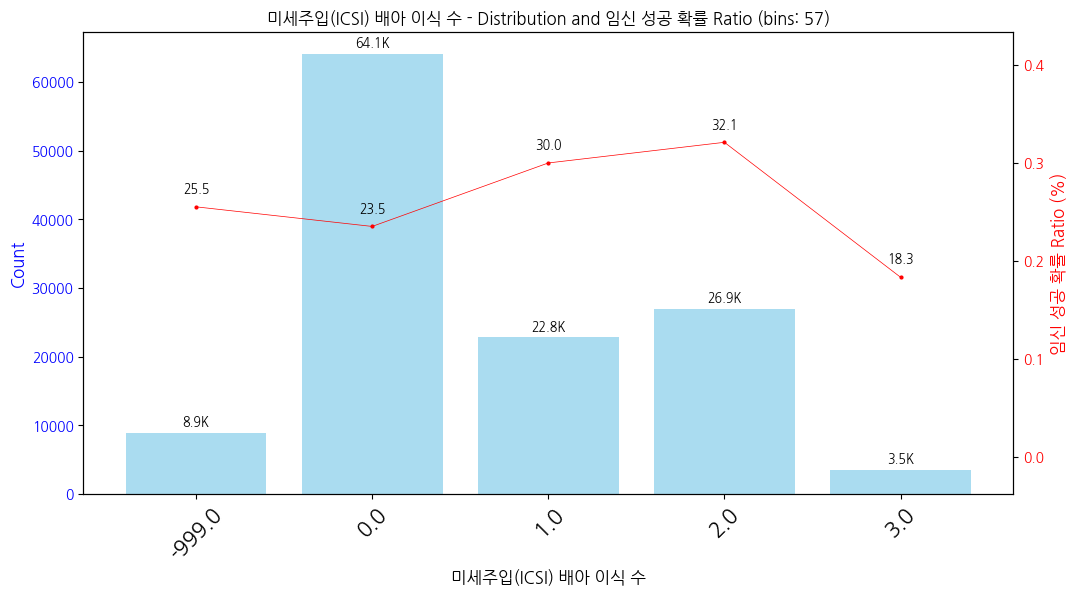

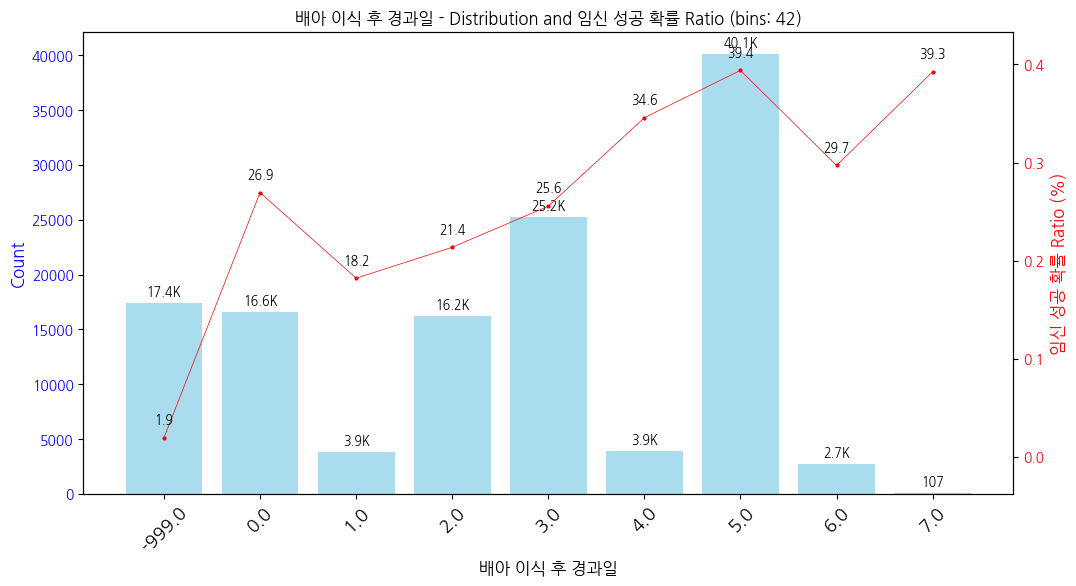

In [11]:
visualize_continuous_with_target(train_pre, cols_to_visualize=cols_cont)


ID에 빈도수가 10개 이상인 값이 없습니다.


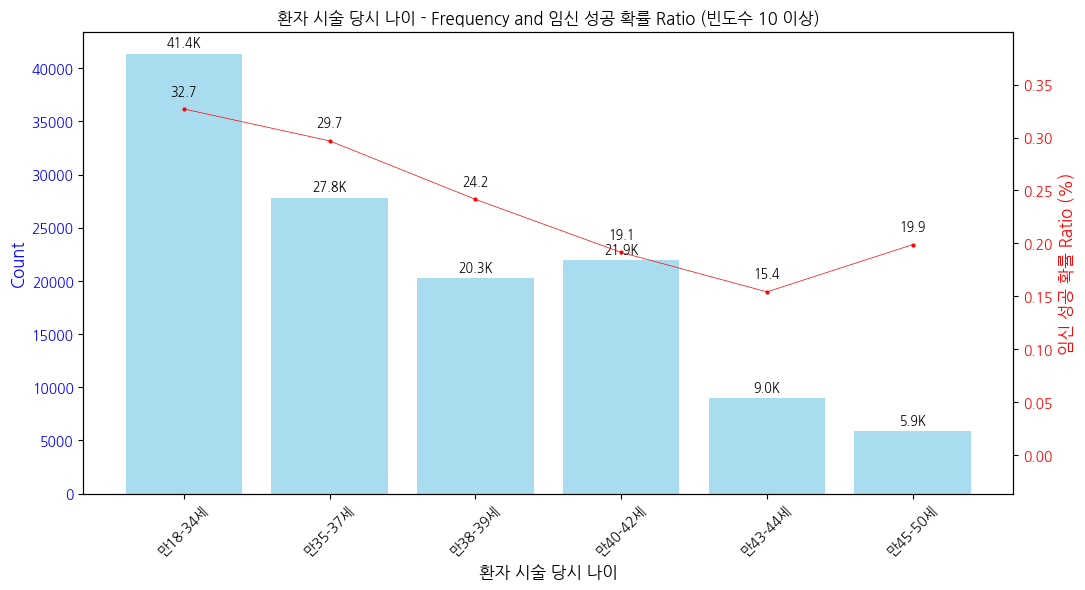

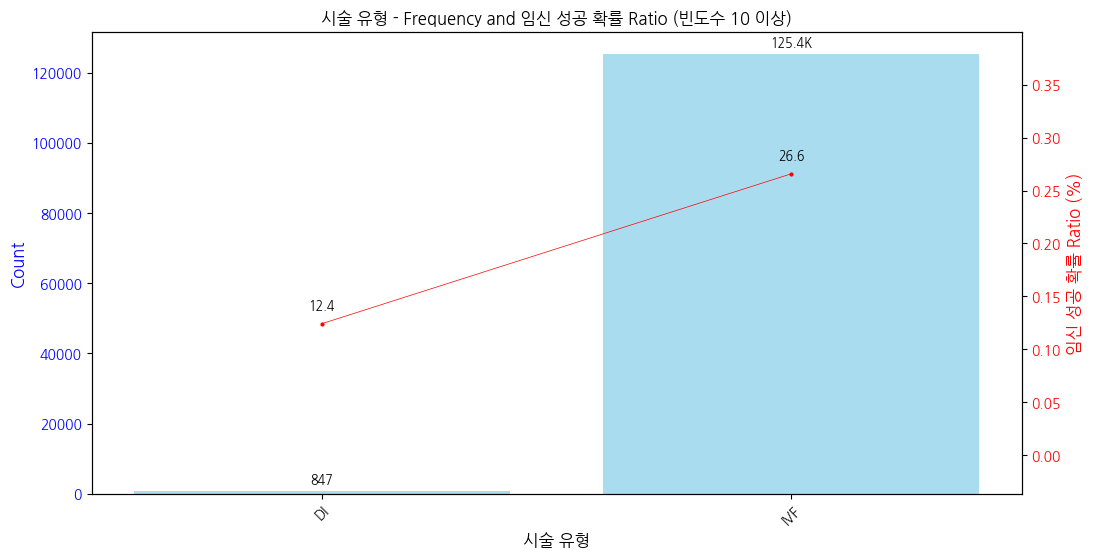

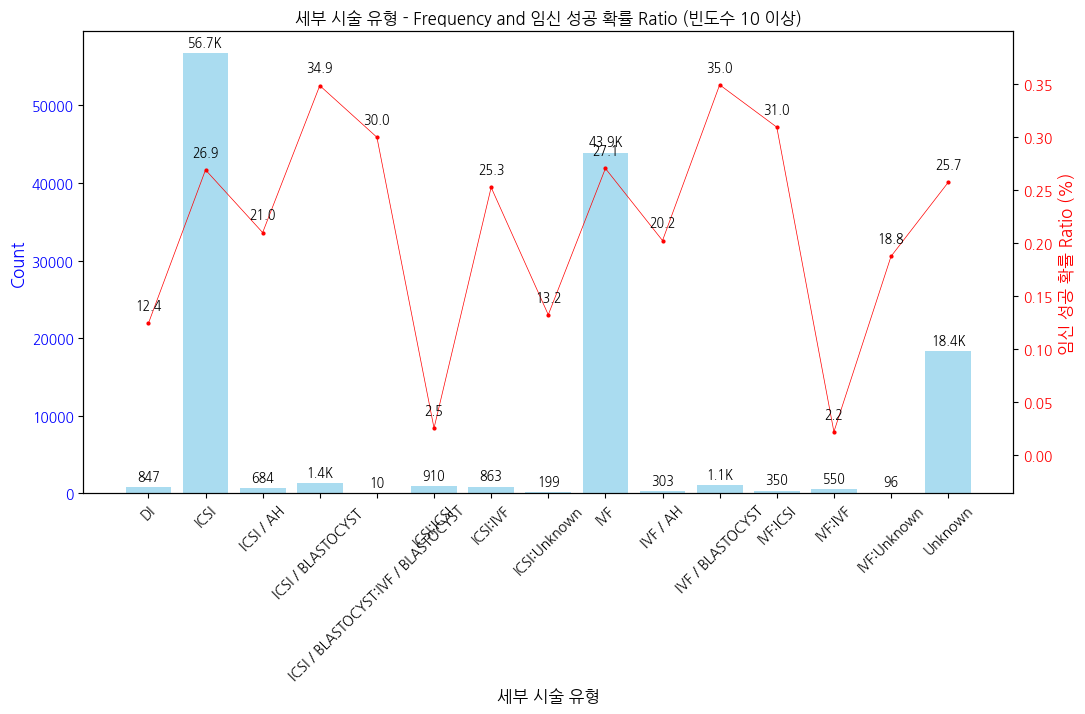

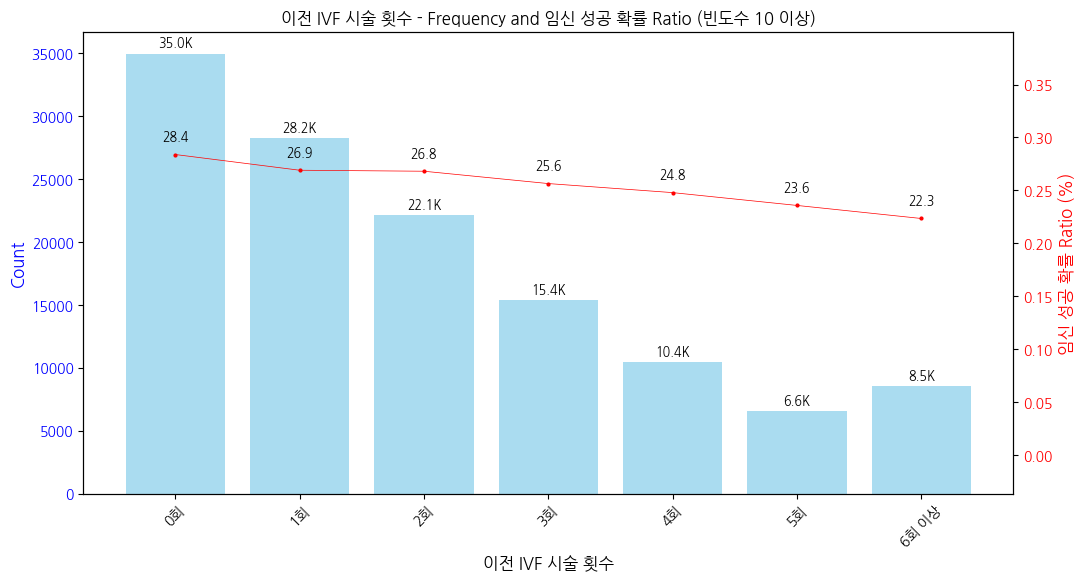

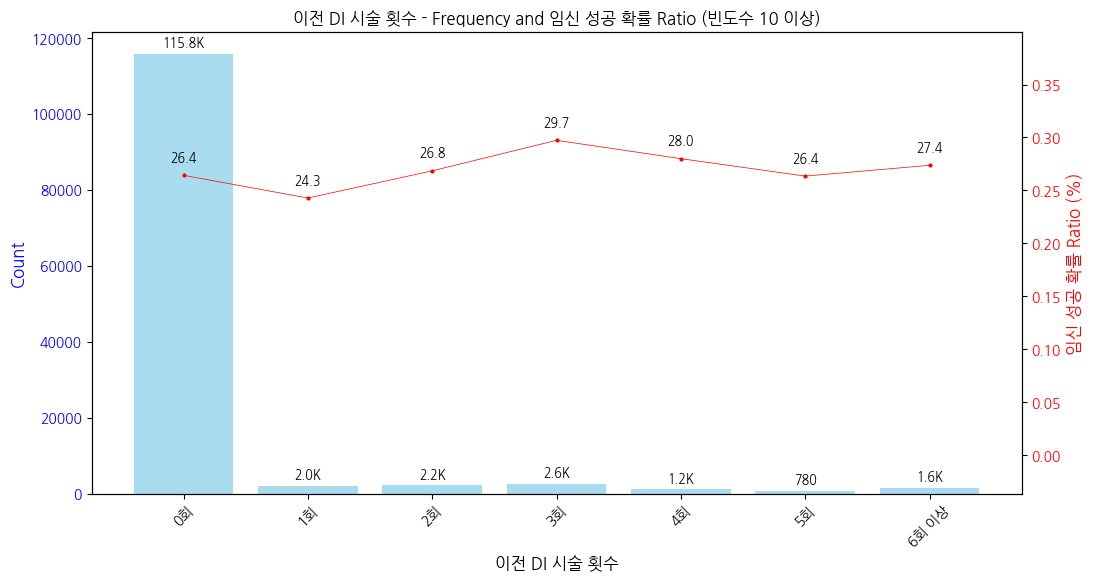

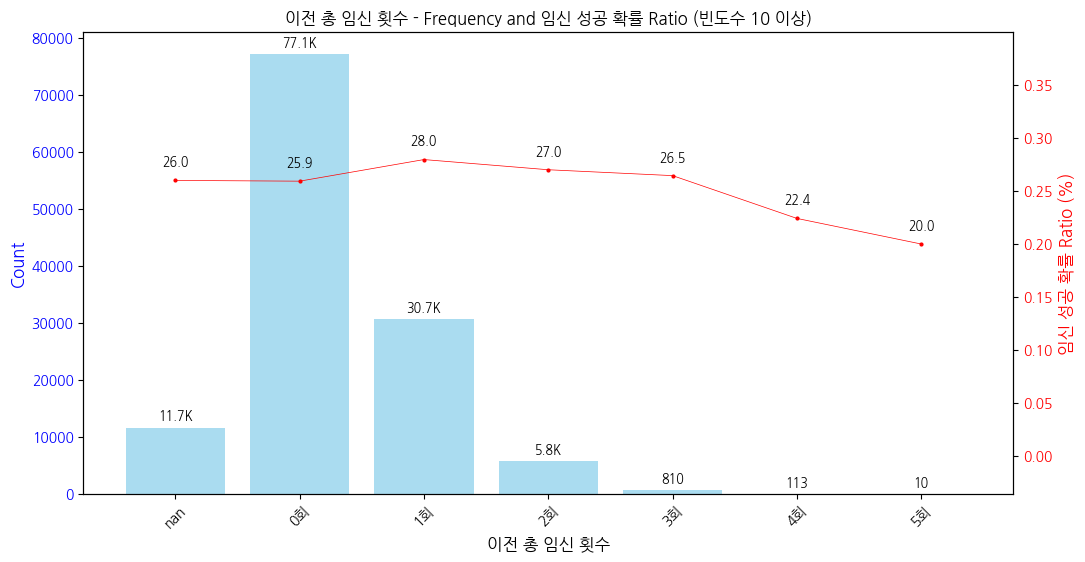

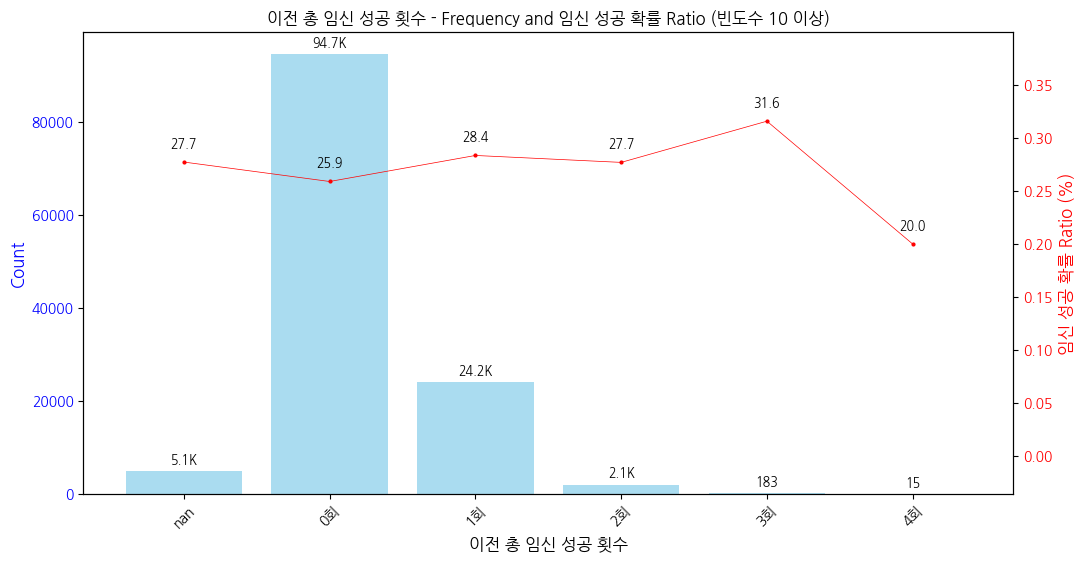

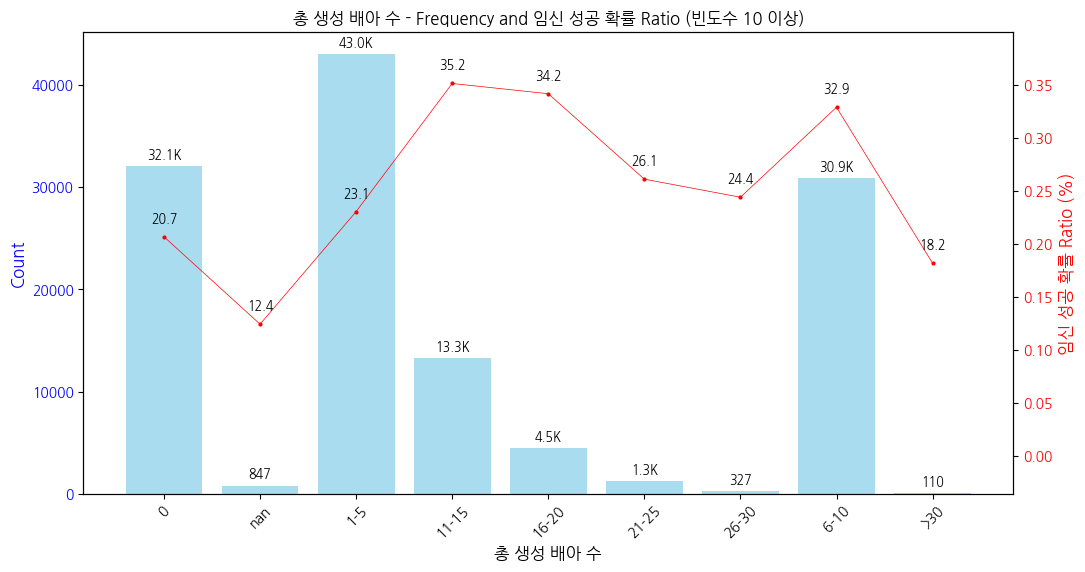

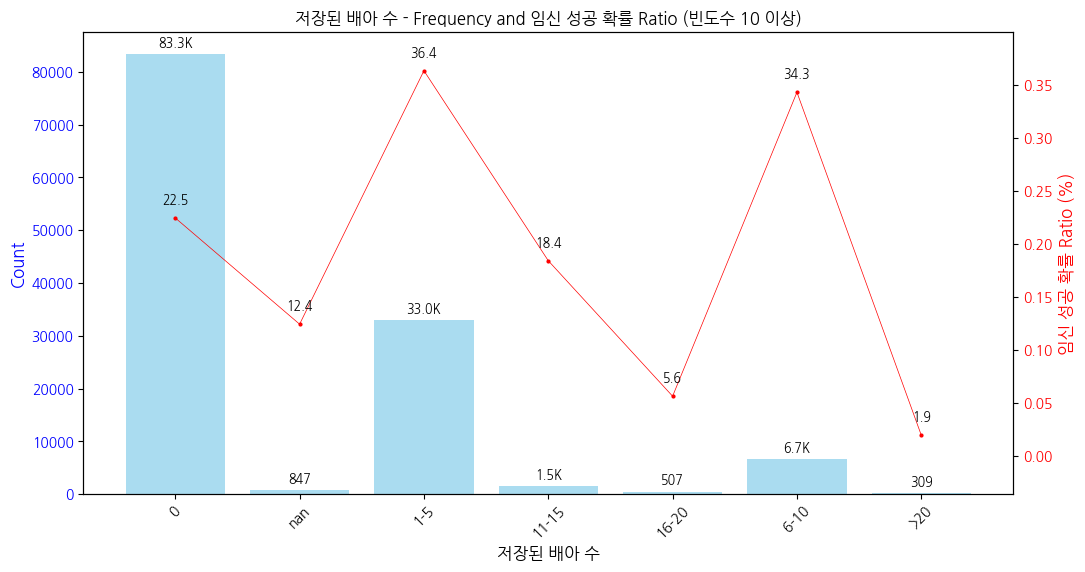

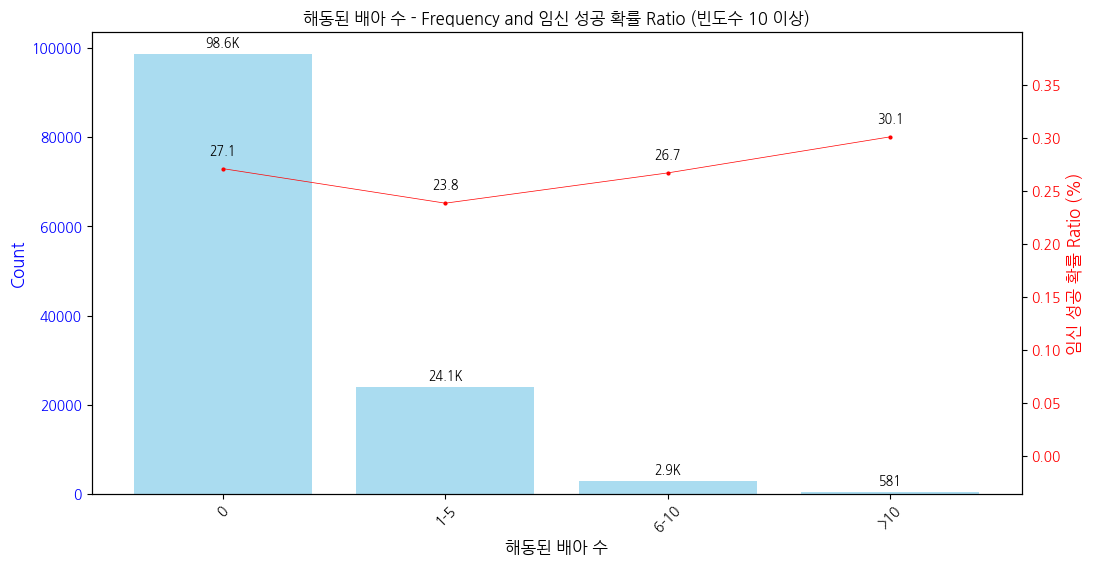

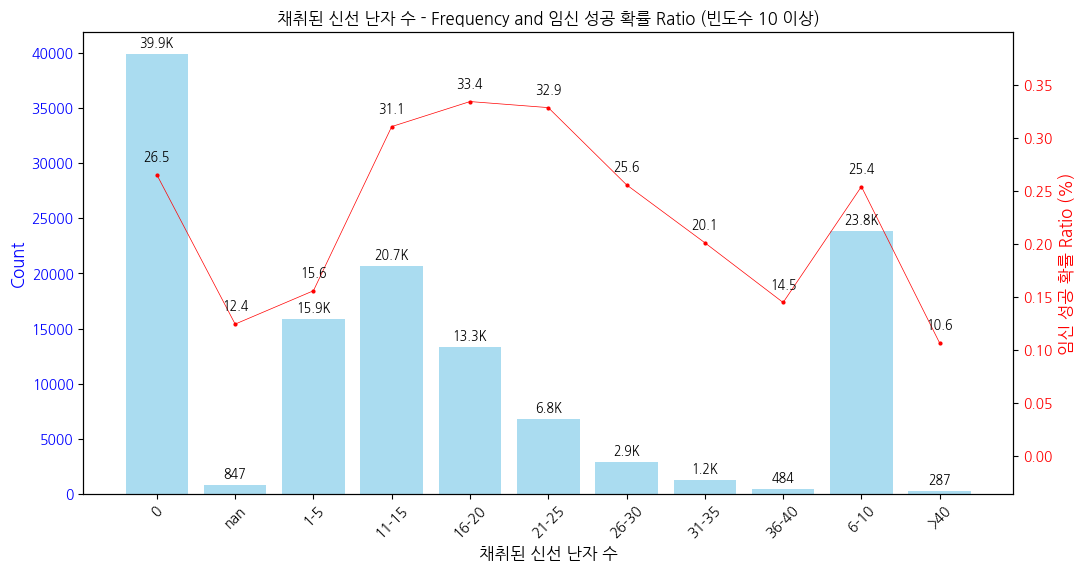

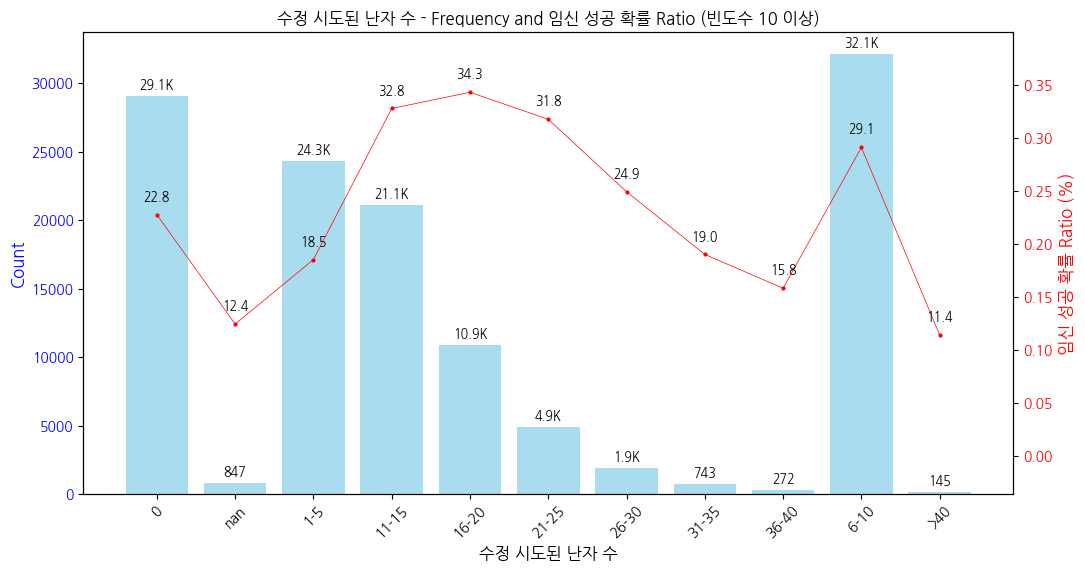

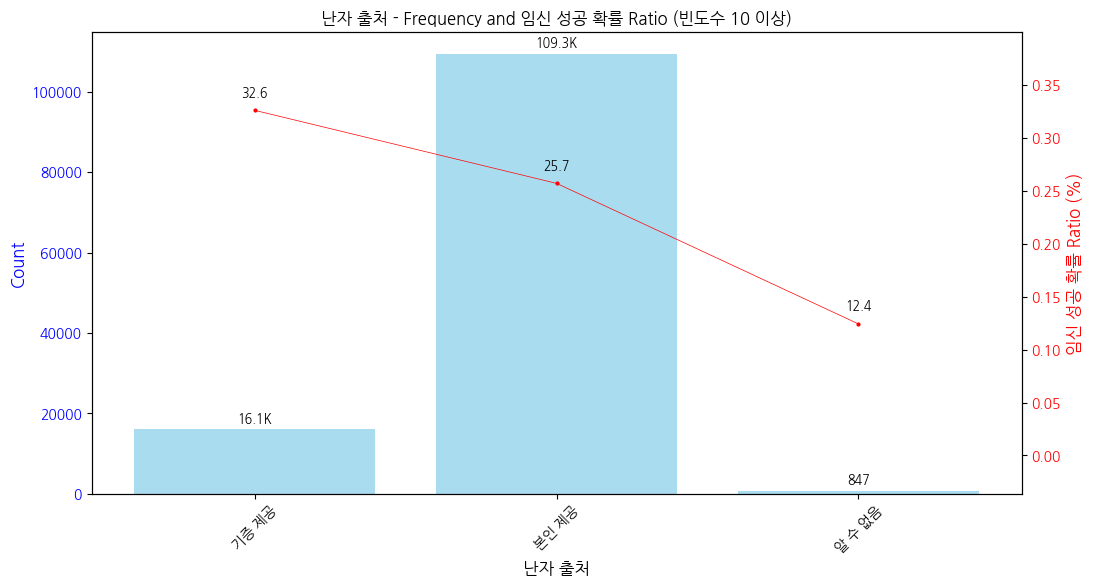

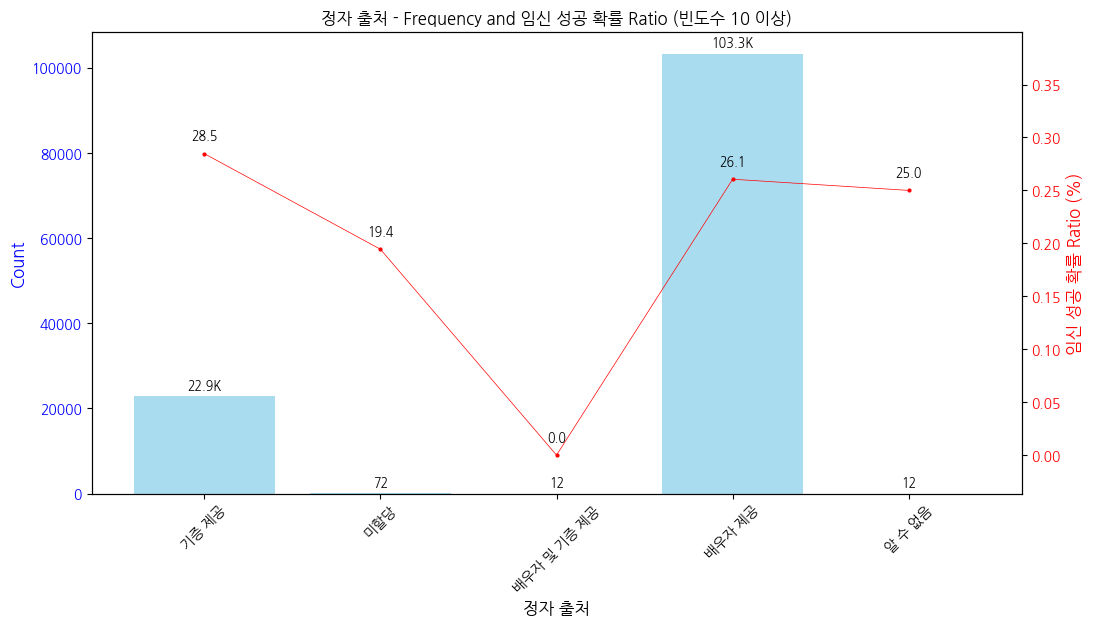

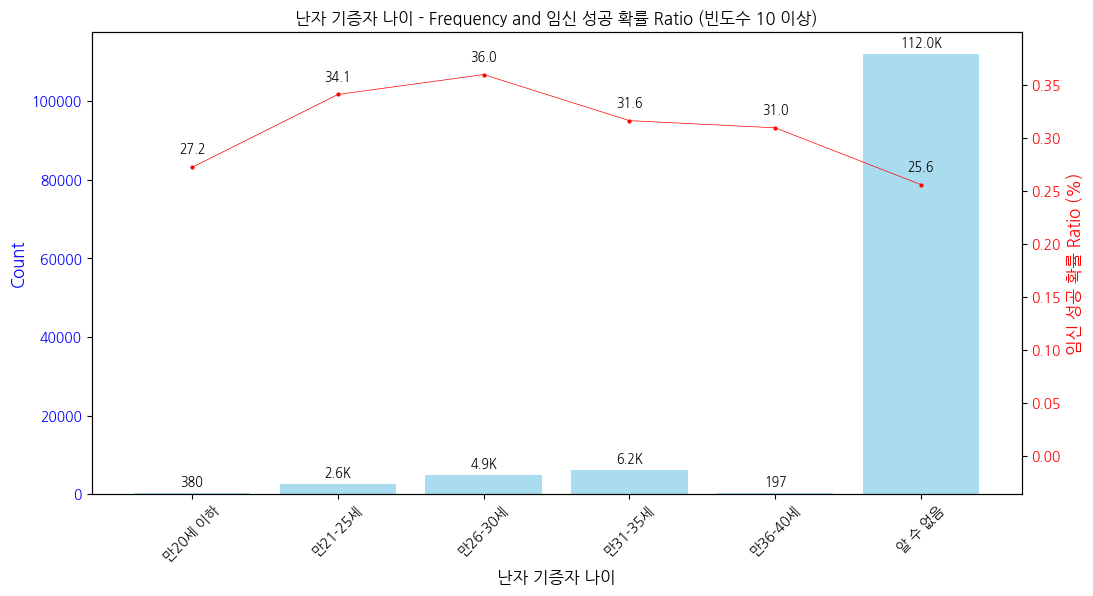

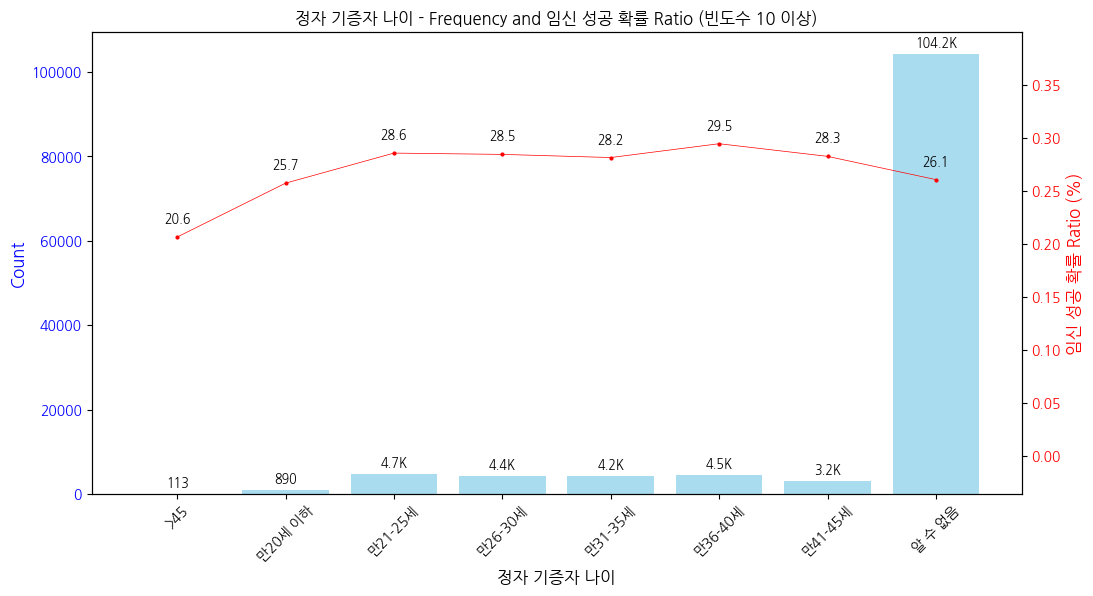

In [12]:
visualize_with_target(train, cols_to_visualize=cols_obj)